<a href="https://colab.research.google.com/github/gabriel7268/PRH35.1_UFBA-ANP/blob/main/C%C3%B3digos/Reuni%C3%A3o_PRH_18_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orientação PRH 07/05

##Feedbacks Reunião 09/04:
adicionar ruídos no y

y = 2*x + k(ruido)    
valores medidos (ponto) e predicao (linha), com legenda    
modelo nao linear y = c1*x1 + c2x2^2 + k(ruido branco mi=0)    
sistema nao linear:   
              

```
y1 = sin(x1)*x2 + x2^2 k(ruido branco mi=0)
```

    y2 = x1x2 + sqrt(x2^3) k(ruido branco u=0)

#### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
print("Bibliotecas carregadas com sucesso.")

Bibliotecas carregadas com sucesso.


### Regressão Linear y = 2x + k (baixo ruido branco)

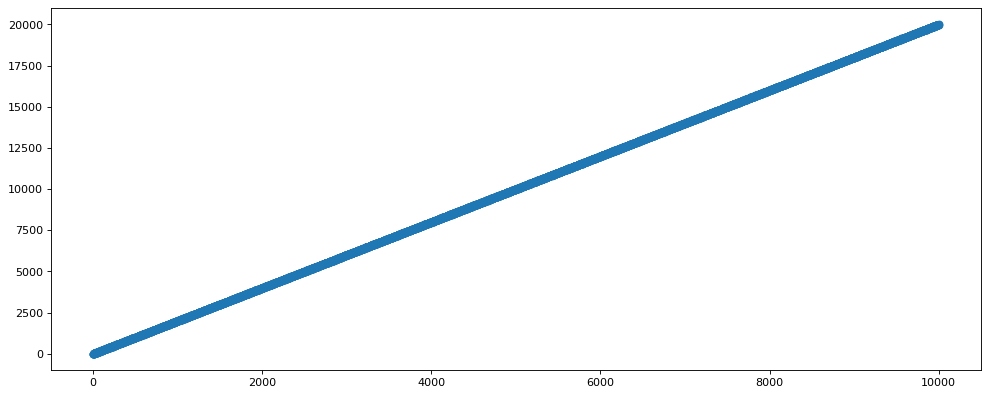

In [2]:
# Função que retorna o erro branco com o desvio padrão e tamanho do array determinado:
def white_noise(sd, x, m=0):
  k = np.random.normal(m,sd,len(x))
  return k

# Determina o tamanho da figura:
plt.figure(figsize=(15, 6), dpi=80)

# Valores de x (variável independente - entrada):
x = np.arange(1,10000,1)
# Valores de y (variável dependente - saída):
y = 2*x + white_noise(10, x)
# Plota gráfico de dispersão:
plt.scatter(x, y)

<class 'numpy.ndarray'>
<class 'list'>


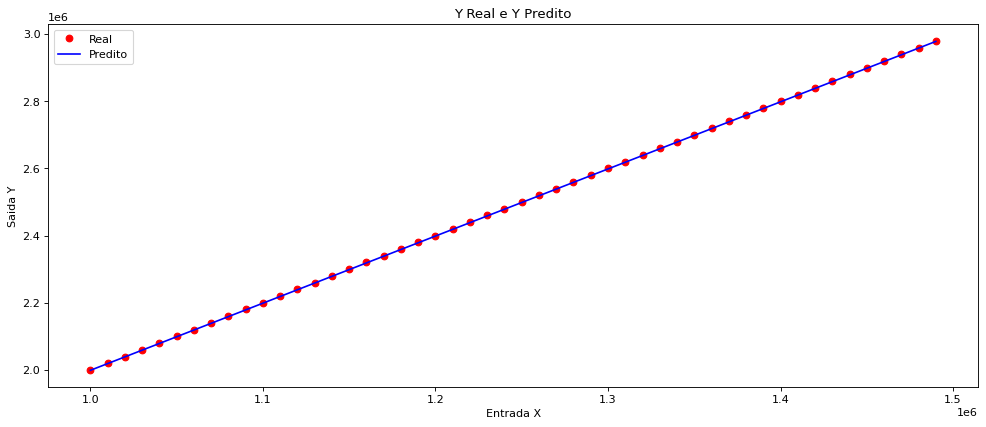

In [3]:
# Define modelo Sequencial, rede neural. Camadas densas: todos os neurônio entre 
                                          #duas camadas subsequentes se conectam
model_l1 = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

# Compilação do modelo, determina otimizador (adam = stochastic gradient descent)
#Função objetivo Erro Médio Absoluto - Mean Absolute Error (MAE)
#Métricas erro médio absoluto:
model_l1.compile(optimizer='adam', loss='mae',
                metrics='mae')

# Treinamento do modelo, epochs = 10, os dados sao aprensentados 10 vezes:
model_l1.fit(x, y, verbose=0, epochs=10)

# Valores de teste para x e y, inéditos para o modelo:
x_test = np.arange(1e6, 1.5e6, 1e4)
y_test = 2*x_test + white_noise(10, x_test)
#print(y_test)

# Predição dos valores de teste:
prediction_l1 = model_l1.predict(x_test)
print(type(prediction_l1))

# Converte tipo de dado de numpy array para lista
prediction_l1 = list(prediction_l1)
print(type(prediction_l1))

# Valores preditos:
y_pred = [y for y in prediction_l1]
# Determina o tamanho da figura 15x6
plt.figure(figsize=(15, 6), dpi=80)


# Plotagem dos dados:
#Dados Real, y = 2x + k
plt.plot(x_test, y_test, 'ro', label = 'Real')
#Saida Predita
plt.plot(x_test, y_pred,'b-', label = 'Predito')
# Configurações do título, legenda e eixos do gráfico:
plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

#Exibir gráfico sem informações desnecessárias:
plt.show();

Regressão Linear y = 2x + k (médio ruido branco)

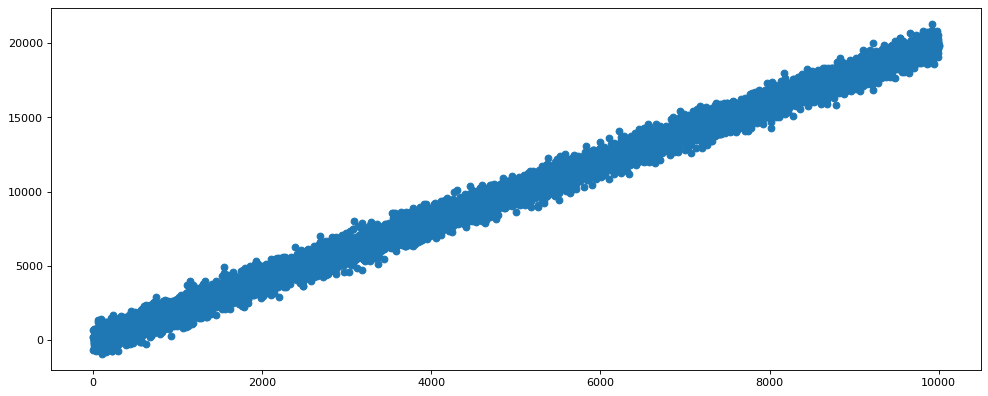

In [4]:
# Determina o tamanho da figura 15x6
plt.figure(figsize=(15, 6), dpi=80)

# Valores de entrada e saída:
x = np.arange(1,10000,1)
y = 2*x + white_noise(500, x)

# Plotagem do gráfico de dispersão:
plt.scatter(x, y)

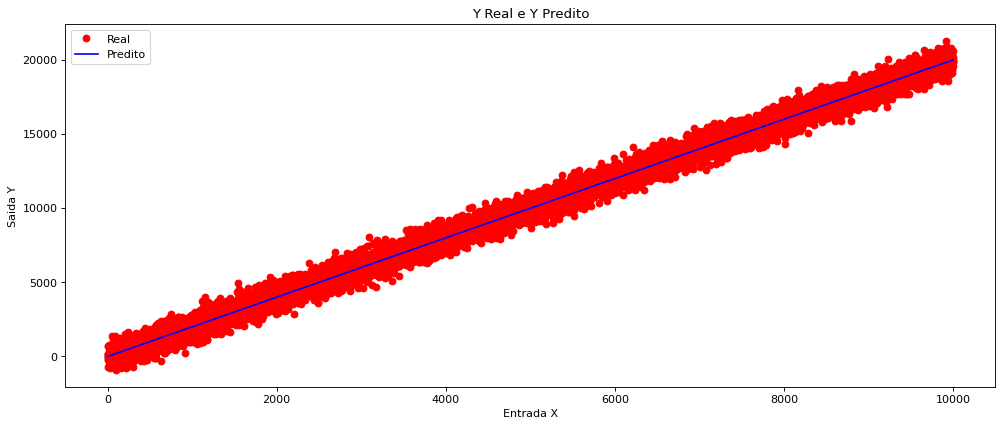

In [5]:
# Modelo sequencial:
model_l2 = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

# Compilação do modelo, determina otimizador (adam = stochastic gradient descent)
#Função objetivo (ou função custo?) Min Erro Absoluto - Mean Absolute Error (MAE)
#Métricas Min erro absoluto:
model_l2.compile(optimizer='adam', loss='mae',
                metrics='mae')
model_l2.fit(x, y, verbose=0, epochs=10)

# Valores de teste:
# x_test = np.arange(1e6, 1.01e6, 1)
# y_test = 2*x_test + white_noise(500, x_test)
#print(y_test)

# Predição:
prediction_l2 = model_l2.predict(x)
#print(prediction_l2, end=' ')

# Converter tipo de dado predição:
# prediction_l2 = list(prediction_l2)

# y_pred = [y for y in prediction_l2]

plt.figure(figsize=(15, 6), dpi=80)

#Dados Real
plt.plot(x, y, 'ro', label = 'Real')
plt.plot(x, prediction_l2,'b-', label = 'Predito')
#Saida Predita
plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

Regressão Linear, y = 2x + k (alto ruido branco)

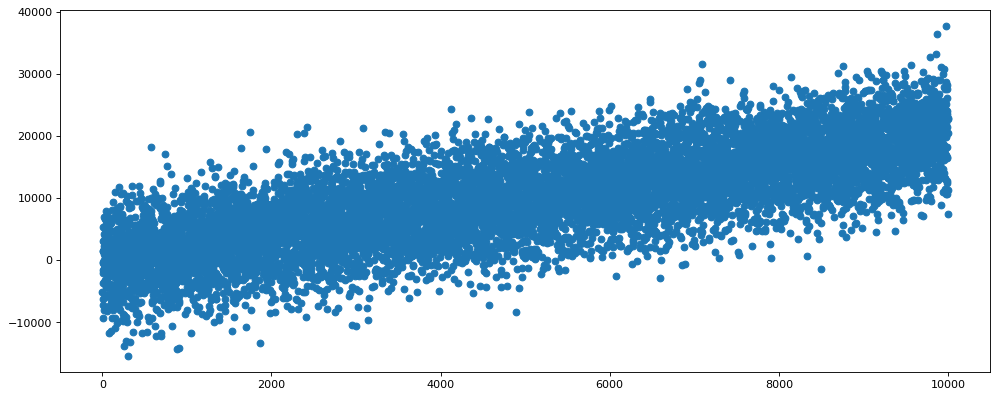

In [6]:
plt.figure(figsize=(15, 6), dpi=80)

x = np.arange(1,1e4,1)
y = 2*x + white_noise(5000, x)

plt.scatter(x, y)

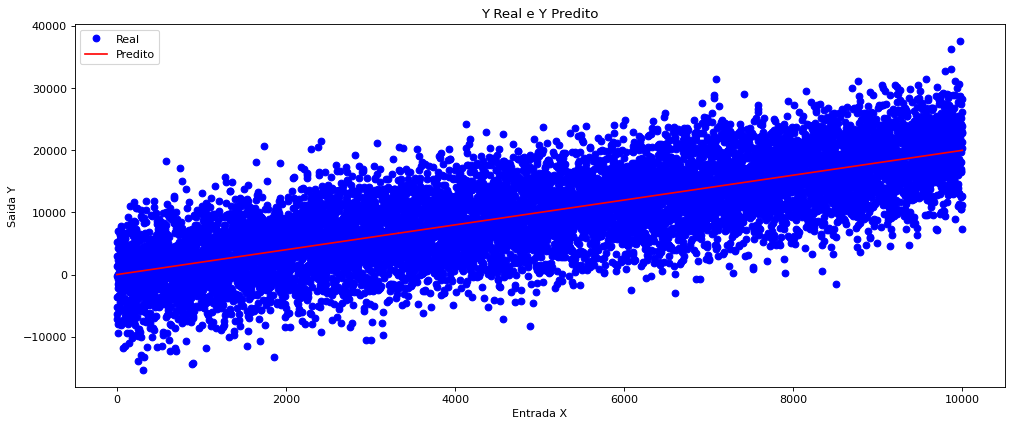

In [7]:
model_l3 = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model_l3.compile(optimizer='adam', loss='mse',
                metrics='mae')
model_l3.fit(x, y, verbose=0, epochs=15)

# x_test = np.arange(1e6, 1.01e6, 1)
# y_test = 2*x_test + white_noise(5000, x_test)
#print(y_test)

prediction_l3 = model_l3.predict(x)
#print(prediction, end=' ')

plt.figure(figsize=(15, 6), dpi=80)
#Dados Real
plt.plot(x, y, 'bo', label = 'Real')
#Saida Predita
plt.plot(x, prediction_l3,'r-', label = 'Predito')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

#explorar tipos de modelos
#usar nome de modelos diferentes (variáveis)
#arquivos separados
#usar tutorial do pacote (keras) e recomendações
#explorar exemplo pronto (mudar os dados)
#começar com dimensoes pequenas
#começar simples e ir evoluindo

#Teste Não Linear pronto Stackoverflow

In [8]:
# X = np.arange(0.0, 5.0, 0.1, dtype='float32').reshape(-1,1)
# y = 5 * np.power(X,2) + np.power(np.random.randn(50).reshape(-1,1),3)

# model_st = keras.Sequential([layers.Dense(12, activation='relu', input_dim = 1),    
#                           layers.Dense(12, activation='relu', kernel_initializer = 'uniform'),
#                           layers.Dense(1, activation = 'linear')
# ])

# #training
# sgd = SGD(lr=0.001);
# model_st.compile(loss='mse', optimizer=sgd)
# model_st.fit(X, y, epochs=1000)

# #predictions
# prediction = model_st.predict(X)

# #plot
# plt.scatter(X, y,edgecolors='g')
# plt.plot(X, prediction,'r')
# plt.legend([ 'Predicted Y' ,'Real Y'])
# plt.show()

#Regressão Não Linear

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
print("Bibliotecas carregadas com sucesso.")

Bibliotecas carregadas com sucesso.


In [10]:
def white_noise(sd, x, m=0):
  k = np.random.normal(m,sd,len(x))
  return k

In [11]:
# Função de normalizar os dados entre a e b:
def normalize_data(x, a, b):
  x_norm = a+((x - x.min())*(b-a))/(x.max()-x.min())
  return x_norm

In [12]:
# def dnormalize_data(x, a, b):
#   x_norm = a+((x - x.min())*(b-a))/(x.max()-x.min())
#   return x_norm

In [13]:
# Testando função:
x = np.arange(0,1000,1)
x_normalizado = normalize_data(x, -1, 1)
print(x.min())
print(x.max())
print(x_normalizado.min())
print(x_normalizado.max())

0
999
-1.0
1.0


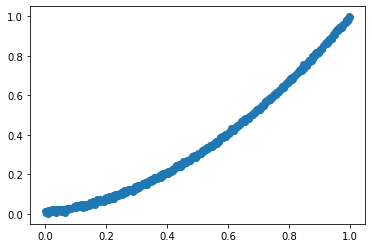

In [14]:
x = np.arange(1, 10, 0.01)
y = x**2 + white_noise(0.5, x)
x_norm = normalize_data(x, 0, 1)
y_norm = normalize_data(y, 0, 1)
plt.scatter(x_norm, y_norm)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


None

<class 'tensorflow.python.keras.callbacks.History'>


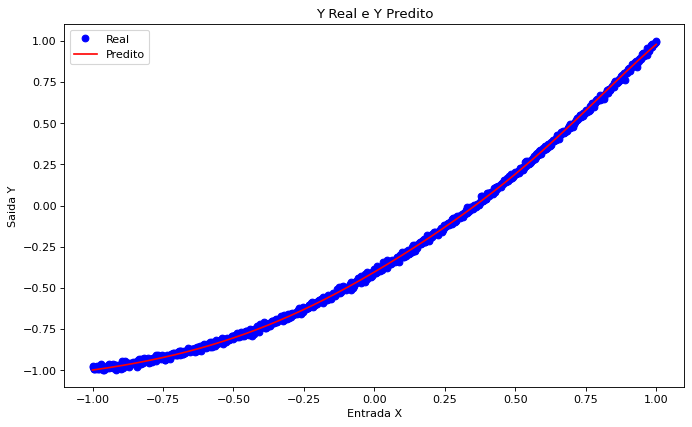

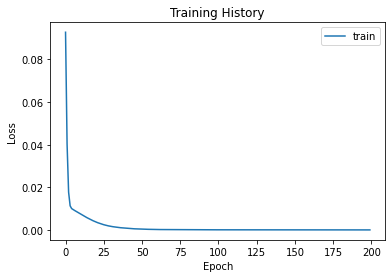

In [15]:
x = np.arange(1, 10, 0.01)
y = x**2 + white_noise(0.5, x)
x_norm = normalize_data(x,-1, 1)
y_norm = normalize_data(y,-1, 1)

model_nl = keras.Sequential([layers.Dense(4, activation='tanh', input_shape=[1]),
                             layers.Dense(2, activation='tanh'),
                            #  layers.Dense(64, activation='relu'),
                             layers.Dense(1, activation = 'linear')
])

#normalização, desnormalização
#teoria das redes sequential keras. tensorflow

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)

sgd = SGD(lr=0.001);
model_nl.compile(loss='mse', optimizer='adam')

display(model_nl.summary())
history = model_nl.fit(x_norm, y_norm, verbose=0, epochs=200, callbacks=[es])
print(type(history))
print(history)
prediction_nl = model_nl.predict(x_norm)

plt.figure(figsize=(10, 6), dpi=80)

plt.plot(x_norm, y_norm, 'bo', label = 'Real')
plt.plot(x_norm, prediction_nl,'r-', label = 'Predito')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()
plt.show();

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.title('Training History'),
plt.xlabel('Epoch'),
plt.ylabel('Loss')
plt.show();

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


None

<class 'tensorflow.python.keras.callbacks.History'>


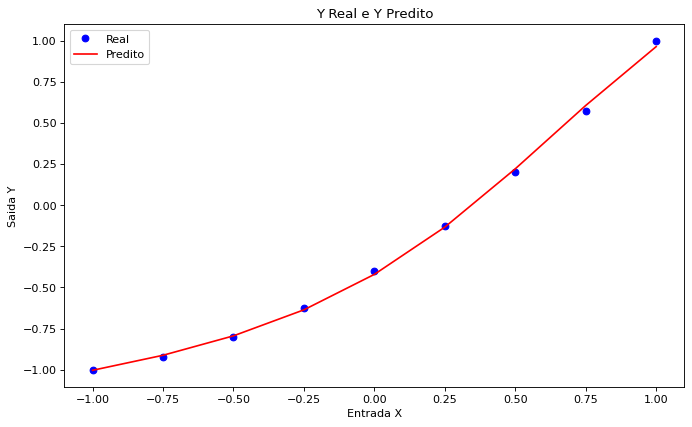

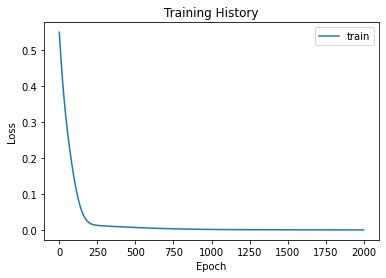

In [16]:
x = np.arange(1, 10, 1)
y = x**2 + white_noise(0.005, x)
x_norm = normalize_data(x, -1, 1)
y_norm = normalize_data(y, -1, 1)

model_nl = keras.Sequential([layers.Dense(8, activation='tanh', input_shape=[1]),
                             layers.Dense(4, activation='tanh'),
                             layers.Dense(1, activation = 'linear')
])

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)

sgd = SGD(lr=0.001);
model_nl.compile(loss='mse', optimizer='adam')

display(model_nl.summary())
history = model_nl.fit(x_norm, y_norm, epochs=2000, verbose=0, callbacks=[es])
print(type(history))
print(history)
prediction_nl = model_nl.predict(x_norm)

plt.figure(figsize=(10, 6), dpi=80)

plt.plot(x_norm, y_norm, 'bo', label = 'Real')
plt.plot(x_norm, prediction_nl,'r-', label = 'Predito')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()
plt.show();

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.title('Training History'),
plt.xlabel('Epoch'),
plt.ylabel('Loss')
plt.show();

Text(0.5, 1.0, 'y = x.cos(x)')

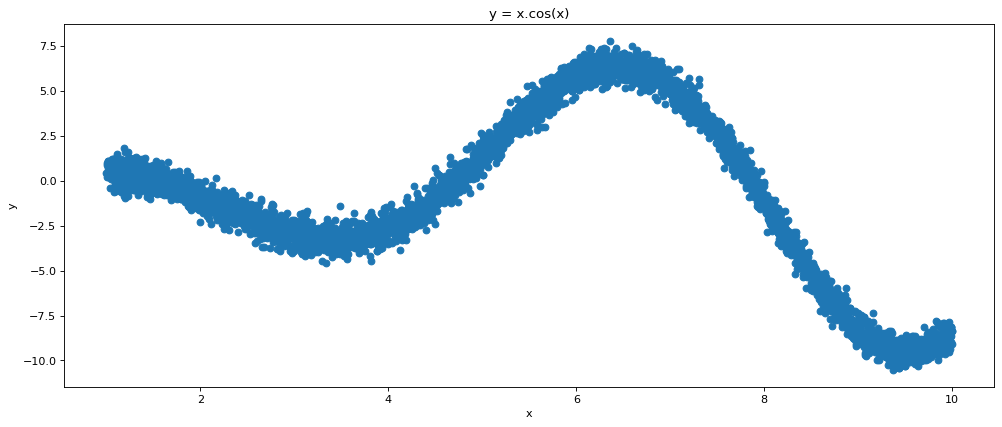

In [17]:
plt.figure(figsize=(15, 6), dpi=80)

x = np.arange(1, 10, 0.002)
y = x*np.cos(x) + white_noise(0.5, x)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x.cos(x)')

## Interpolação

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


None

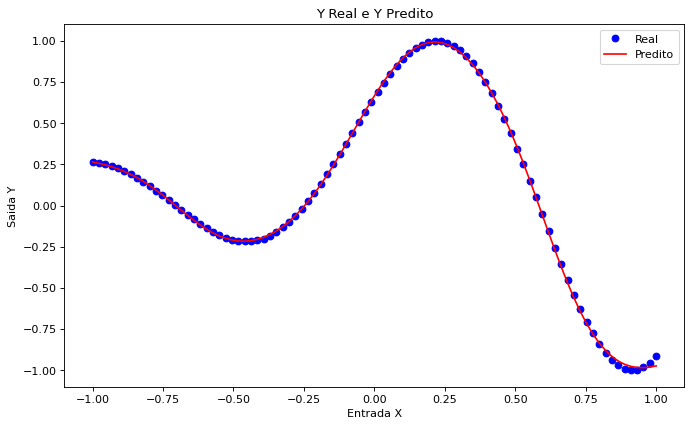

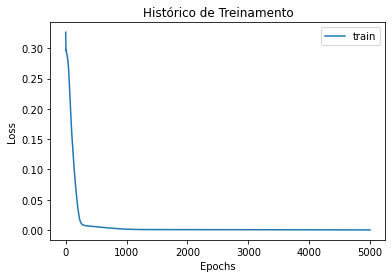

In [18]:
# Dados de entrada
x = np.arange(1, 10, 0.1)
# Dados de saida
y = x*np.cos(x) + white_noise(0.005, x)
# NORMALIZAR
x_norm = normalize_data(x, -1, 1)
y_norm = normalize_data(y, -1, 1)
# INVESTIGAR POUCOS DADOS

# Modelo Sequencial
model_nl = keras.Sequential([layers.Dense(12, activation='tanh', input_shape=[1]),
                             layers.Dense(8, activation='tanh'),
                             layers.Dense(1, activation = 'linear')
])

# FUNÇÕES DE ATIVAÇÃO ALINHADAS COM NORMALIZAÇÃO
# RELU USADA P/ CLASSIFICAÇÃO

# Parada antecipada, quando o modelo atinge bom resultado para treinamento:
es = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=200)
# Otimizador
sgd = SGD(learning_rate=0.001);
# Compilação
model_nl.compile(loss='mse', optimizer='adam')
# Resumo do Modelo
display(model_nl.summary())
# Treinamento
history = model_nl.fit(x_norm, y_norm, epochs=5000, verbose=0, callbacks=[es])
# Predições
prediction_nl = model_nl.predict(x_norm)
# Plotagem
plt.figure(figsize=(10, 6), dpi=80)
# Plotar desnormalizado
plt.plot(x_norm, y_norm, 'bo', label = 'Real')
plt.plot(x_norm, prediction_nl,'r-', label = 'Predito')
plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
# plt.xlim(1, 10)
plt.legend()
plt.show();
# Plotagem do histórico
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.title('Histórico de Treinamento'),
plt.xlabel('Epochs'),
plt.ylabel('Loss')
plt.show();

## Extrapolação

In [19]:
# Dados de treinamento:
x = np.arange(1, 10, 0.002)
y = x*np.cos(x) + white_noise(0.5, x)
# Dados de Teste:
x_test = np.arange(1.001, 10, 0.002)
y_test = x_test*np.cos(x_test) + white_noise(0.5, x_test)
# Comparação:
dadost = pd.DataFrame({'x': x, 'x_test': x_test})
display(dadost.head())

,x,x_test
0,1.000,1.001
1,1.002,1.003
2,1.004,1.005
3,1.006,1.007
4,1.008,1.009


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


None

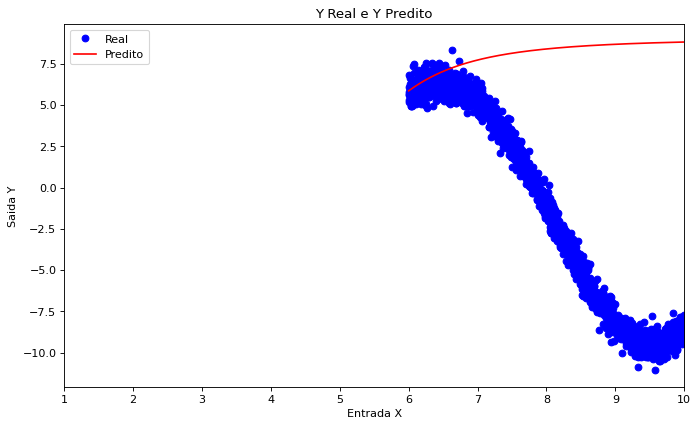

In [20]:
# Dados de treinamento - entrada
x = np.arange(1, 6, 0.002)
# Dados de treinamento - saida
y = x*np.cos(x) + white_noise(0.5, x)
# Dados de teste - entrada
x_test = np.arange(6, 11, 0.002)
# Dados de teste - saída
y_test = x_test*np.cos(x_test) + white_noise(0.5, x_test)
# Modelo Sequencial
model_nl = keras.Sequential([layers.Dense(32, activation='sigmoid', input_shape=[1]),
                             layers.Dense(16, activation='sigmoid'),
                             layers.Dense(1, activation = 'linear')
])

# Parada antecipada, quando o modelo atinge bom resultado para treinamento:
es = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=200)
# Otimizador
# sgd = SGD(learning_rate=0.001);
# Compilação
model_nl.compile(loss='mse', optimizer='adam')
# Resumo do Modelo
display(model_nl.summary())
# Treinamento
history = model_nl.fit(x, y, epochs=500, verbose=0, callbacks=[es])
# Predições
prediction_nl = model_nl.predict(x_test)
# Plotagem
plt.figure(figsize=(10, 6), dpi=80)
# Plotar desnormalizado
plt.plot(x_test, y_test, 'bo', label = 'Real')
plt.plot(x_test, prediction_nl,'r-', label = 'Predito')
plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.xlim(1, 10)
plt.legend()
plt.show();

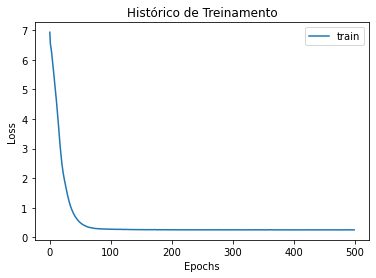

In [21]:
# Plotagem do histórico
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.title('Histórico de Treinamento'),
plt.xlabel('Epochs'),
plt.ylabel('Loss')
plt.show()

# Regressão com Dados Externos

## Carregando Dados

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
print("Bibliotecas carregadas com sucesso.")

Bibliotecas carregadas com sucesso.


In [23]:
def white_noise(sd, x, m=0):
  k = np.random.normal(m,sd,len(x))
  return k

In [24]:
# Função de normalizar os dados entre a e b:
def normalize_data(x, a, b):
  x_norm = a+((x - x.min())*(b-a))/(x.max()-x.min())
  return x_norm

In [25]:
# Ler dados do arquivo csv e armazenar em um dataframe
dados = pd.read_csv('https://github.com/gabriel7268/Datasets/raw/main/dados.csv')
# Exemplos mais praticos, citar referencias
# Cabeçalho dos dados (5 primeiras linhas):
display(dados.head())
# Estatísticas:
display(dados.describe())

,A,B,C,D,E,Y
0,0.920574,0.326861,0.527807,0.203113,0.994426,1.306219
1,0.484593,0.108276,0.388172,0.465689,0.173284,1.358122
2,0.827789,0.865967,0.930056,0.558215,0.152119,2.302618
3,0.205889,0.216347,0.878902,0.329863,0.244587,0.734088
4,0.066839,0.429225,0.497779,0.009710,0.271564,0.806973


,A,B,C,D,E,Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.485033,0.502687,0.498929,0.511487,0.493451,1.437711
std,0.287185,0.298800,0.285695,0.294206,0.296256,0.638877
min,0.001588,0.000965,0.001264,0.002852,0.000454,0.120175
25%,0.227320,0.216063,0.247879,0.257727,0.228805,0.947447
50%,0.476073,0.496219,0.502359,0.535935,0.501299,1.374400
75%,0.732618,0.762582,0.742396,0.768167,0.746639,1.909524
max,0.998899,0.998522,0.998820,0.999955,0.998971,3.576721


In [26]:
# Informações, linhas nulas, tipo de dado etc
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       500 non-null    float64
 1   B       500 non-null    float64
 2   C       500 non-null    float64
 3   D       500 non-null    float64
 4   E       500 non-null    float64
 5   Y       500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


In [27]:
# Separando dados em dados de entrada e de saída:
# Variáveis preditoras:
X = dados.drop('Y', axis=1)
print("Dados de Entrada: ")
display(X.head())
# Variável a ser predita:
Y = dados.Y
print("\nDados de Saída: ")
display(Y.head())

Dados de Entrada: 


,A,B,C,D,E
0,0.920574,0.326861,0.527807,0.203113,0.994426
1,0.484593,0.108276,0.388172,0.465689,0.173284
2,0.827789,0.865967,0.930056,0.558215,0.152119
3,0.205889,0.216347,0.878902,0.329863,0.244587
4,0.066839,0.429225,0.497779,0.009710,0.271564



Dados de Saída: 


0    1.306219
1    1.358122
2    2.302618
3    0.734088
4    0.806973
Name: Y, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


None

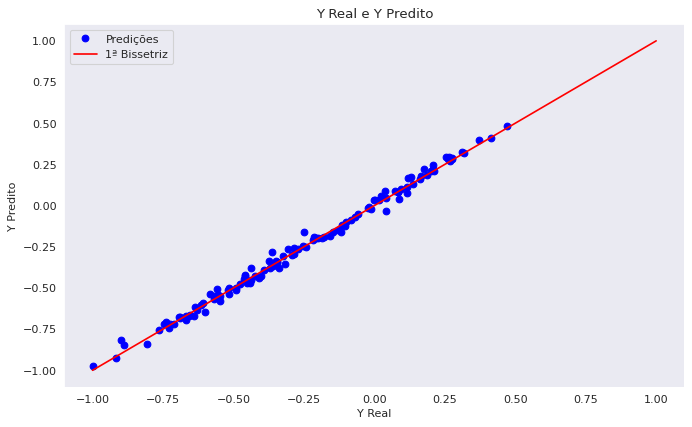

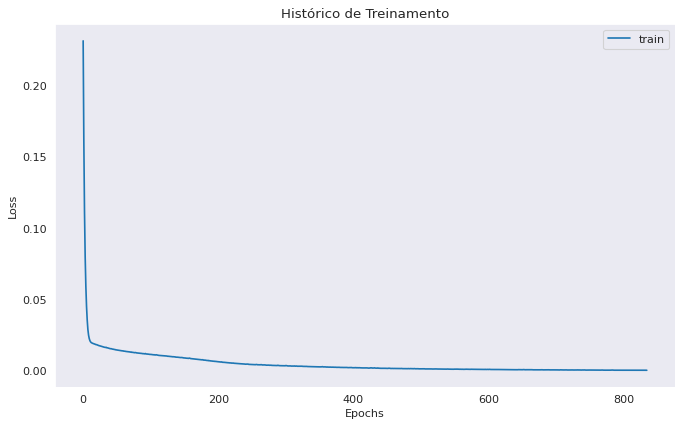

In [61]:
X_norm = normalize_data(X, -1, 1)
Y_norm = normalize_data(Y, -1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm)
# Modelo Sequencial
model_de = keras.Sequential([layers.Dense(8, activation='tanh', input_shape=[5]),
                             layers.Dense(4, activation='tanh'),
                             layers.Dense(1, activation = 'linear')
])
# Parada antecipada
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)
# Otimizador
sgd = SGD(learning_rate=0.001);
# Compilação
model_de.compile(loss='mse', optimizer='adam')
# Resumo do Modelo
display(model_de.summary())
# Treinamento
history = model_de.fit(X_train, Y_train, epochs=835, verbose=0, callbacks=[es])
# Predições
prediction_de = model_de.predict(X_test)
# Plotagem
sns.set_style('dark')
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(Y_test, prediction_de,'bo', label='Predições')
j = np.arange(-1,2)
plt.plot(j,j, 'r', label='1ª Bissetriz')
plt.title("Y Real e Y Predito")
plt.xlabel('Y Real')
plt.ylabel('Y Predito')
plt.legend()
plt.savefig('saida_real_saida_predita.png')
plt.show();
# Histórico
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('Histórico de Treinamento'),
plt.xlabel('Epochs'),
plt.ylabel('Loss')
plt.savefig('custo_epochs.png')
plt.show();
# PRIMEIRA BISSETRIZ JUNTO
# RNN

In [62]:
# Transformando dados de saída em array
y = np.array(Y_test)
# Diminuindo dimensão da predição
prediction_de = prediction_de.flatten()
# Criando DataFrame de Saída Real e Saída Predita
dfm = pd.DataFrame({'Y': y, 'prediction_de': prediction_de,'Resíduo': prediction_de-y})
# Calculando correlação entre Saída Real e Saída Predita
print(dfm['Y'].corr(dfm['prediction_de']))
dfm.columns = ['Saída Real', 'Saída Predita', 'Resíduo']
display(dfm.head())
print(dfm.shape)
# R^2, MSE, RMSE, R^2 AJUSTADO, AIC..., ANALISE DE RESIDUO, TESTE DE HIPOTESE H0=MEDIA 0
# CORRELAÇÃO DOS PARAMETROS
# SIMULAÇÃO MONTE CARLO
# DADOS BCS

0.9970819739933657


,Saída Real,Saída Predita,Resíduo
0,-0.208505,-0.195408,0.013097
1,-0.198406,-0.198390,0.000016
2,-0.739316,-0.705672,0.033644
3,-0.184584,-0.196642,-0.012057
4,-0.306627,-0.265911,0.040716


(125, 3)


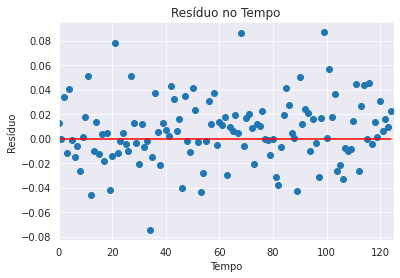

In [63]:
y = np.array(Y_test)
res = prediction_de - y
sns.set_style('dark')
plt.figure()
plt.scatter(range(len(Y_test)), res)
plt.plot(range(len(Y_test)), [0]*len(Y_test), 'r-')
plt.title("Resíduo no Tempo")
plt.xlim(0,125)
plt.xlabel('Tempo')
plt.ylabel('Resíduo')
plt.grid()
plt.savefig('residuo_no_tempo.png')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


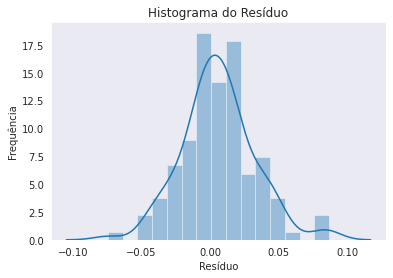

In [64]:
sns.set_style('dark')
sns.distplot(res)
plt.title('Histograma do Resíduo')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.savefig('dist_residuo.png')
plt.show();
# TESTE HIPOTESE DIST NORMAL

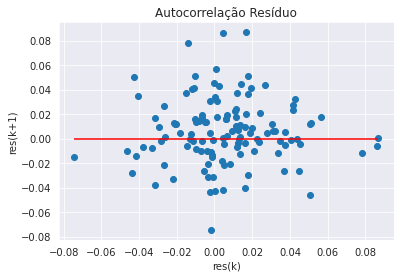

In [65]:
sns.set_style('dark')
plt.scatter(res[0:123], res[1:124])
plt.xlabel('res(k)')
plt.ylabel('res(k+1)')
plt.title('Autocorrelação Resíduo')
plt.hlines(0, res.min(), res.max(), 'r')
plt.grid()

# Testes

In [40]:
model_nl2 = keras.Sequential([layers.Dense(10, activation='relu', input_dim = 1),    
                          layers.Dense(10, activation='relu', kernel_initializer = 'uniform'),
                          layers.Dense(1, activation = 'linear')
])

# https://keras.io/api/models/model_training_apis/#predict-method
# model(x, training=False)

#training
sgd = SGD(lr=0.001);
model_nl2.compile(loss='mse', optimizer=sgd)
model_nl2.fit(x_norm, y, epochs=100)

x_test = np.arange(1,21,1)
y_test = x_test + white_noise(1, x_test)

prediction = model_nl2(x_norm, train=False)
#prediction_nl = model_nl2.predict(x_norm)
#print(prediction, end=' ')

prediction_nl = list(prediction_nl)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


ValueError: ignored

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
#Dados Real
plt.plot(x_norm, y, 'bo', label = 'Real')
#Saida Predita
plt.plot(x_norm, y_pred,'r-', label = 'Predito')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)

x = np.arange(1, 10, 0.1).reshape(-1,1)
y = np.power(x,2) + white_noise(10, x).reshape(-1,1)

x_norm = preprocessing.minmax_scale(x, feature_range=(-1, 1), axis=0)


'''
x = np.arange(0.0, 5.0, 0.1, dtype='float32').reshape(-1,1)
y = 5 * np.power(X,2) + np.power(np.random.randn(50).reshape(-1,1),3)
'''
plt.subplot(1,2,1)
plt.scatter(x, y)
plt.subplot(1,2,2)
plt.scatter(x_norm, y)

In [ ]:
model_nl3 = keras.Sequential([layers.Dense(50, activation='relu', input_dim = 1),    
                          layers.Dense(32, activation='relu', kernel_initializer = 'uniform'),
                          layers.Dense(1, activation = 'linear')
])


#training
sgd = SGD(lr=0.001);
model_nl3.compile(loss='mse', optimizer=sgd)
model_nl3.fit(x_norm, y, epochs=1000)

x_test = np.arange(1,21,1)
y_test = x_test + white_noise(1, x_test)
#print(y_test)

prediction_nl = model_nl3.predict(x_norm)
#print(prediction, end=' ')

prediction_nl = list(prediction_nl)

y_pred = [y for y in prediction_nl]

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
#Dados Real
plt.plot(x_norm, y, 'bo', label = 'Real')
#Saida Predita
plt.plot(x_norm, y_pred,'r-', label = 'Predito')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

In [ ]:
plt.figure(figsize=(15,5))
x = np.arange(1, 20, 0.1)
y = np.log(x) + white_noise(0.01, x)

x_norm = preprocessing.minmax_scale(x, feature_range=(-1, 1), axis=0)

plt.subplot(1,2,1)
plt.scatter(x, y)
plt.subplot(1,2,2)
plt.scatter(x_norm,y)

In [ ]:
from keras.optimizers import SGD

model_sin = keras.Sequential([layers.Dense(20, activation='tanh', input_dim = 1),    
                          layers.Dense(20, activation='tanh', kernel_initializer = 'uniform'),
                          layers.Dense(1)
])

sgd = SGD(lr=0.001);
model_sin.compile(loss='mse', optimizer=sgd)
model_sin.fit(x_norm, y, epochs=100)

prediction_nl = model_sin.predict(x_norm)

prediction_nl = list(prediction_nl)
y_pred = [y for y in prediction_nl]

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)
#Dados Real
plt.plot(x, y, 'bo', label = 'Real')
#Saida Predita
plt.plot(x, y_pred,'r-', label = 'Predito')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

Não linear, y = c1*x1 + c2x2^2 + k(ruido branco mi=0)

In [ ]:
plt.figure(figsize=(10, 6), dpi=80)

x1 = np.arange(1,21,0.5)
x2 = np.arange(1,21,0.5)
dados = pd.DataFrame({'x1': x1, 'x2': x2, 'y': (2*x1 + 3*(x2**2) + white_noise(0.1,x1))})

X_norm = preprocessing.minmax_scale(X, feature_range=(-1, 1), axis=0)

display(dados.head())
Y = dados['y']
X = dados.drop(columns='y')
t = range(0,len(Y),1)
plt.subplot(1,2,1)
plt.plot(X, Y)
plt.subplot(1,2,2)
plt.plot(X_norm,Y)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15, 6), dpi=80)

x1 = np.arange(1,100,1)
x2 = np.arange(1,100,1)
X1, X2 = np.meshgrid(x1, x2)
Y = 2*X1 + 3*X2**2 + white_noise(1, x1)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, Y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
model_mv = keras.Sequential([layers.Dense(10, activation='tanh', input_shape= (2,)),
                             layers.Dense(10, activation='tanh', kernel_initializer = 'uniform'),    
                          layers.Dense(1, activation = 'linear')
])

sgd = SGD(lr=0.001);
model_mv.compile(loss='mse', optimizer=sgd)
model_mv.fit(X_norm, Y, epochs=1000)

prediction_mv = model_mv.predict(X_norm)

prediction_mv = list(prediction_mv)
y_pred = [y for y in prediction_mv]

plt.figure(figsize=(10, 6), dpi=80)
#Dados Real
plt.plot(X, Y, 'bo')
#Saida Predita
plt.plot(X, y_pred,'r-')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

In [ ]:
plt.contourf(X1, X2, Y)
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
y2 = 2*X1**2*X2 + -np.sqrt(50*X2**3) + np.sin(X1)*X1**4 + white_noise(1, x1)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, y2)
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:

x = np.arange(1,100,1)
y = np.arange(2,200,2)

model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = [1e6, 2e6]
y_test = [2*x for x in x_test]
print(y_test)

prediction = model.predict(x_test)
print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

plt.figure(figsize=(15, 6), dpi=80)

#Dados de Treinamento
plt.subplot(1, 2, 1)
plt.plot(x, y, 'black')
plt.title("Dados do Treinamento")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
#Dados Real, y = 2x
plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'r')
plt.plot(x_test, y_pred,'b')
plt.title("Y Real")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')


plt.tight_layout()

plt.show();

In [ ]:
x = np.arange(1,10000,1)
y = np.arange(2,20000,2)

model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = [1e6, 1.2e6, 1.4e6, 1.6e6, 1.8e6, 2e6]
y_test = [2*x for x in x_test]
print(y_test)

prediction = model.predict(x_test)
print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

plt.figure(figsize=(15, 6), dpi=80)

#Dados de Treinamento
plt.subplot(1, 2, 1)
plt.plot(x, y, 'black')
plt.title("Dados do Treinamento")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
#Dados Real, y = 2x
plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'ro', label='Real')
plt.plot(x_test, y_pred,'b-', label='Predito')
plt.title("Y Real")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.tight_layout()

plt.show();

### Predição Consumo de Combustível

In [ ]:
'''
Model.compile(
    optimizer="rmsprop",
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    **kwargs
)

Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

'''

In [ ]:
#Download do Dataset
download_dataset = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")



In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
 
#Leitura do Dataset e armazenamento na variável dados
dados = pd.read_csv(download_dataset, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

#Pré-tratamento de dados faltantes, elimina-os
#dados = dados.dropna()

dados2=dados.copy()
dados2.head()

#Variável Categórica: Origin, converte para one-hot 
origin = dados2.pop('Origin')
dados['USA'] = (origin == 1)*1.0
dados['Europe'] = (origin == 2)*1.0
dados['Japan'] = (origin == 3)*1.0

dados.head()

train_dataset = dados.sample(frac=0.8,random_state=0)
test_dataset = dados.drop(train_dataset.index)


In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])


model.summary()
train_labels = train_dataset.pop('MPG')
EPOCHS = 1000

model.fit(train_dataset, train_labels, epochs=1000)


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

### Predição Preço de Apartamento

In [ ]:
melbourne_data = pd.read_csv('/content/Melbourne_housing_FULL.csv') 
melbourne_data.columns
melbourne_data.head()

y = melbourne_data.Price

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = melbourne_data[melbourne_features]

melbourne_model = keras.Sequential([layers.Dense(16, activation = 'relu', input_shape=5),
                                    layers.Dense(16, activation = 'relu'),
                                    layers.Dense(1)
])


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])



melbourne_model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])

# Fit model
melbourne_model.fit(X, y, epochs=10)


In [ ]:
melbourne_data = pd.read_csv('/content/Melbourne_housing_FULL.csv') 
melbourne_data.columns
melbourne_data.head()